# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [0]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[1,1,0,0]]).T

In [2]:
y


array([[1],
       [1],
       [0],
       [0]])

In [0]:
i = np.random.seed(1)
i

### 參數定義

1. Dataset:

  X 輸入資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。

  y 輸出資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。



2. Layer

  Input : l0 網路第 1 層，即網路輸入層。

  Hidden Layer: l1 網路第 2 層，常稱作隱藏層。

  Weight: syn0 第一層權值，突觸 0 ，連接 l0 層與 l1 層。

逐元素相乘，故兩等長向量相乘等同於其對等元素分別相乘，結果為同等長度的向量。
– 元素相減，故兩等長向量相減等同於其對等元素分別相減，結果為同等長度的向量。

x.dot(y) 若 x 和 y 為向量，則進行點積操作；若均為矩陣，則進行矩陣相乘操作；若其中之一為矩陣，則進行向量與矩陣相乘操作。

In [0]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1
# define syn1

iter = 0
syn0_history = [syn0]
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

syn1 = 2*np.random.random((3,1)) - 1  #第二層隱層”間權重初值如何設?
syn1_history = [syn1]



In [42]:
print(X)
syn0

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


array([[-9.67271027],
       [ 0.20893805],
       [ 4.62884222]])

In [43]:
np.dot(l0,syn0)

array([[ 4.62884222],
       [ 4.83778028],
       [-5.04386805],
       [-4.83492999]])

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [41]:
for iter in range(10000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l0,syn0))  #hidder second layer如何設??
    
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
 
    # how much did we miss?
    #l1_error = y - l1
    l2_error = y - l2
    l1_error = y - l1  #l1_error改成和l2_error 相同??
    
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    
    l1_delta = l1_error * nonlin(l1,True)
    l2_delta = l2_error * nonlin(l2,True)
    
    # update weights
    syn0 += np.dot(l0.T,l1_delta)
    syn1 += np.dot(l1.T,l2_delta)
    
     # syn1 update weights
    
print("Output After Training:")
print(l1)
print("\n\n")
print(l2)

Output After Training:
[[0.9903279 ]
 [0.99213728]
 [0.00640776]
 [0.00788499]]



[[0.9903279 ]
 [0.99213728]
 [0.00640776]
 [0.00788499]]


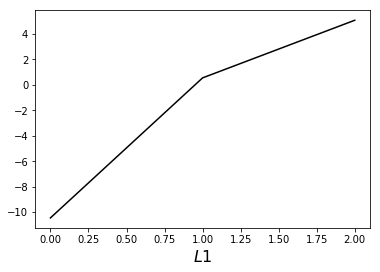

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()